In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
from matplotlib import colormaps
import matplotlib.colors as mcolors

In [2]:
# get the colors and genus in descending order as previously defined in script: M2_DefineColors
goodColors = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/GitHub/HostMicrobiomeEvol/Metagenomics/2_Analysis/M2_colors_ColorsRGB.npy')
goodColorsHEX = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/GitHub/HostMicrobiomeEvol/Metagenomics/2_Analysis/M2_colors_ColorsHEX.npy')
genus_descending = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/GitHub/HostMicrobiomeEvol/Metagenomics/2_Analysis/M2_colors_genusDescending.npy')

In [3]:
# read in data to panda

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/"
#file="motus_Merge_genus_032024_0.01minFrac_FromPY"
file="KraBracken_DBstandard_042024_0minFrac_genus_FromPY"
#file="KraBracken_DBplusPf_042024_0.01minFrac_genus_FromPY"

df=pd.read_csv(InPath+file+".csv",delimiter=",")

threshold = 0.01
df

## exclude specific 

,name_short,institution,treatment,replicate,week,Abyssalbus,Abyssibius,Acetobacter,Acetobacterium,Acetobacteroides,...,Yoonia,Youhaiella,Zhihengliuella,Zhongshania,Zobellella,Zobellia,Zophobihabitans,Zunongwangia,Zymobacter,Zymomonas
0,Gent_bb_1_1,Gent,bb,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gent_bb_1_2,Gent,bb,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gent_bb_1_3,Gent,bb,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gent_bb_1_4,Gent,bb,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gent_bb_15_1,Gent,bb,1,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,WUR_bb_15_1,WUR,bb,1,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,WUR_bb_15_2,WUR,bb,2,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,WUR_bb_15_3,WUR,bb,3,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,WUR_bleach_15_1,WUR,bleach,1,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Threshold:
Here, for every plot we ask which species is at least in 1 sample at the threshold and then we plot these species for all the samples. This means that we do show sometimes species that are there less than 0.01. Why do we do this? Otherwise it would look as if the sample doesn't have the species and maybe that would be misleasding?

In [46]:
#df_plot_Here = df_sort
##filter=('bb')
df_plot = df[(df["week"]==1)]
df_plot_drop=df_plot.drop(['name_short',"institution","treatment","replicate","week"],axis=1)

#keep only the columns that are larger than or equal to 0.01
df_plot_temp = df_plot_drop.loc[:, (df_plot_drop >= 0.01).any(axis=0)]

## now get the species and colors that are relevant for this plot!

## Sort the df according to the list genus_descending AND
## -- make sure that the colors for the species that don't exist are deleted:
species_here = list(df_plot_temp.columns)

species_idx = []
for i in range(len(genus_descending)):
    if genus_descending[i] in species_here:
        species_idx.append(i)

#aa = df_plot_temp[df_plot_Here["name_short"]=="Gent_bb_15_2"]
#aa_clean = aa##.drop(['name_short',"institution","treatment","replicate","week"],axis=1)
#aaa = np.array(aa_clean.values)
#aaa[0].sum()
#df_plot_temp
#df_plot_temp.sum(1)
#df_plot

IndexError: index 0 is out of bounds for axis 0 with size 0

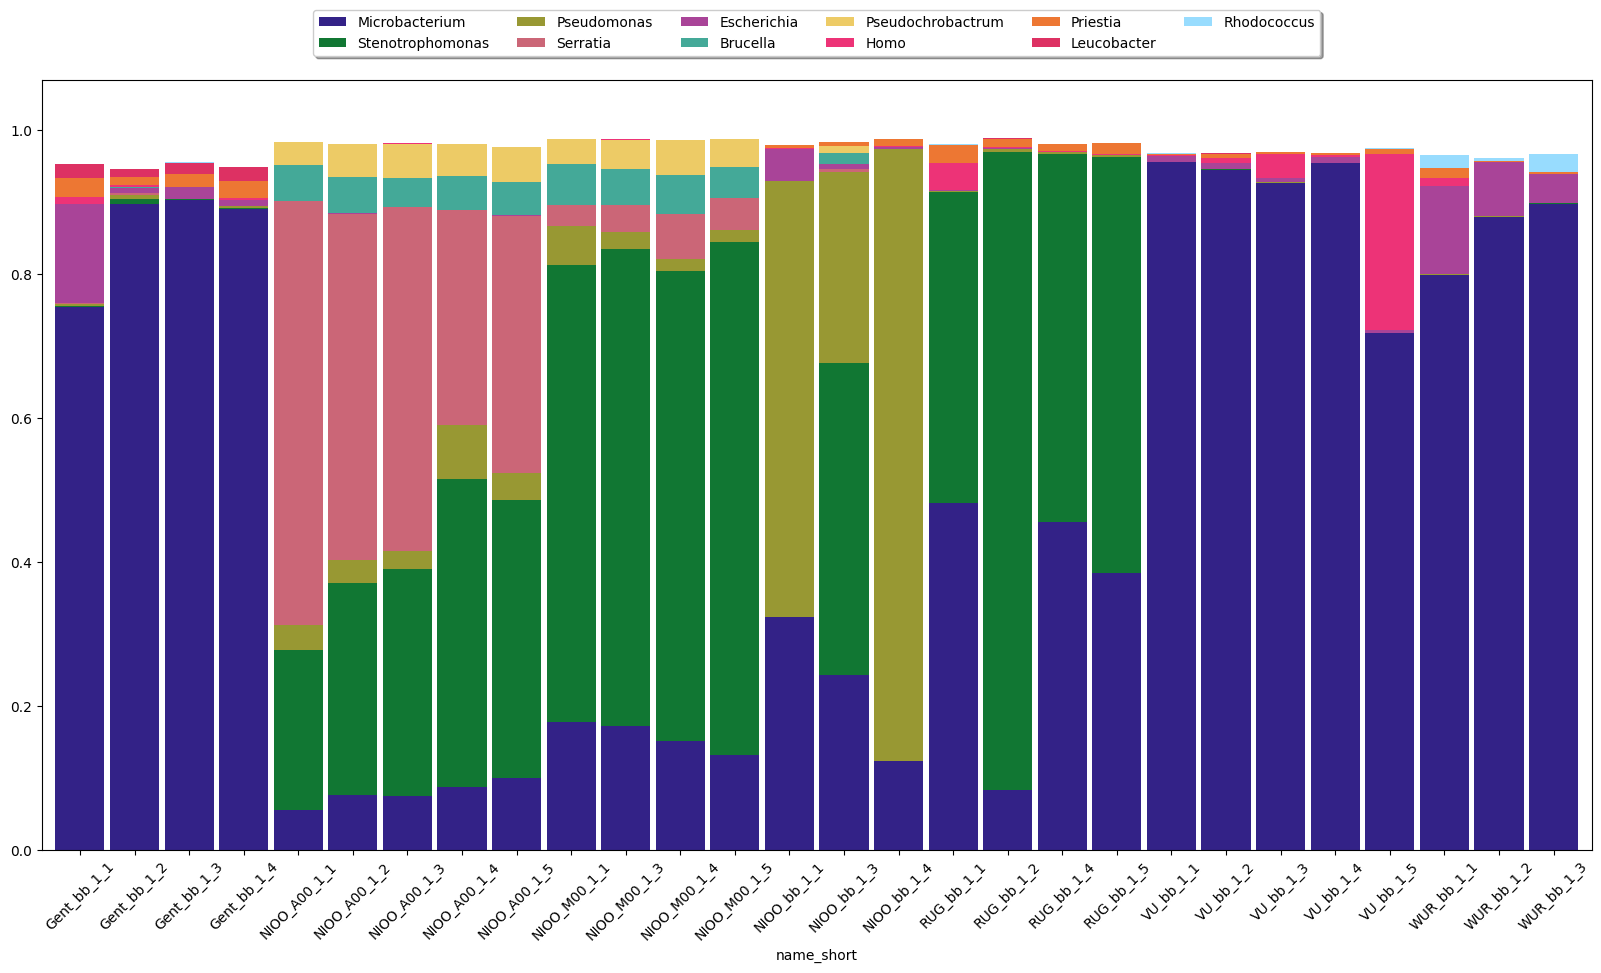

In [47]:
##PLOT

# get the names and the values and then sort both
df_plot_Here = df_plot[['name_short'] + list(genus_descending[species_idx])]
finalColors_Here = goodColors[species_idx]

# Generate some sequential data
sampleNames=df_plot_Here['name_short']


#fig, ax1 = plt.subplots(figsize=(20,5))
# create stacked bar chart for monthly temperatures
ax1 = df_plot_Here.plot.bar(x='name_short', stacked=True, figsize=(20,10), width=0.9, color=finalColors_Here)
ax1.legend([],[], frameon=False)


ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=6, fancybox=True, shadow=True)


#ax.set_ylim(0,500)
#ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels(sampleNames,rotation=45)
#ax1.set_xlim([-1,5])
ax1.set_ylim([0,1.07])
#plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/plots/' + "AllSamples_week1" + '_legend.svg',
 #           dpi=200)
df_plot_Here

aa = df_plot_Here[df_plot_Here["name_short"]=="Gent_bb_15_2"]
aa_clean = aa.drop(['name_short'],axis=1)
aaa = np.array(aa_clean.values)
aaa[0].sum()

In [39]:
goodColors

array([[0.19921875, 0.1328125 , 0.53125   , 1.        ],
       [0.06640625, 0.46484375, 0.19921875, 1.        ],
       [0.59765625, 0.59765625, 0.19921875, 1.        ],
       [0.796875  , 0.3984375 , 0.46484375, 1.        ],
       [0.53125   , 0.1328125 , 0.33203125, 1.        ],
       [0.6640625 , 0.265625  , 0.59765625, 1.        ],
       [0.86328125, 0.86328125, 0.86328125, 1.        ],
       [0.53125   , 0.796875  , 0.9296875 , 1.        ],
       [0.265625  , 0.6640625 , 0.59765625, 1.        ],
       [0.9296875 , 0.796875  , 0.3984375 , 1.        ],
       [0.9296875 , 0.19921875, 0.46484375, 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.99609375, 0.6640625 , 0.73046875, 1.        ],
       [0.59765625, 0.46484375, 0.        , 1.        ],
       [0.59765625, 0.265625  , 0.33203125, 1.        ],
       [0.9296875 , 0.46484375, 0.19921875, 1.        ],
       [0.46484375, 0.69921875, 0.86328125, 1.        ],
       [0.796875  , 0.19921875,